In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/keteb/OneDrive/Bureau/github/Portfolio_clusturing/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() 

df_cleaned = df_cleaned.transpose() 


In [4]:
df_cleaned.shape

(5279, 663)

In [29]:
rolling_mean = df.transpose().rolling(window=20).mean()

In [31]:
rolling_mean

ticker,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2020,0.000672,-0.001262,0.000598,0.001421,-0.001745,0.000381,-0.001104,-0.000702,0.001628,-0.002485,...,-0.000848,0.002032,0.000341,-0.002173,0.000864,-0.000534,0.000298,-0.003731,0.000450,0.002365
28/12/2020,0.001280,-0.000491,-0.000385,0.000961,-0.001795,0.000704,-0.000142,-0.000821,-0.000892,-0.002562,...,-0.000895,0.002101,0.000684,-0.001729,0.000473,-0.000333,0.000989,-0.002496,0.000957,0.002550
29/12/2020,0.002098,-0.000249,-0.000672,-0.000082,-0.001768,0.000710,0.000302,0.000295,-0.001866,-0.002769,...,-0.001117,0.001242,0.000289,-0.001274,0.000359,-0.000264,0.002208,-0.001040,0.001064,0.002846
30/12/2020,0.000861,-0.000189,-0.000443,0.000184,-0.001225,0.000471,0.000409,-0.000775,-0.002254,-0.002474,...,-0.000205,0.000818,-0.000038,-0.001031,0.000311,-0.000124,0.003127,-0.000220,0.001371,0.002025


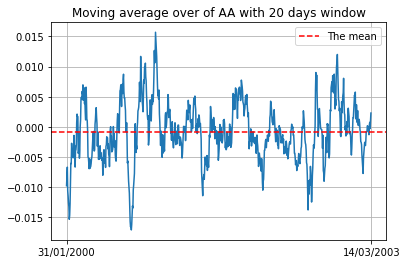

In [75]:
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()


- La tendance à long terme n'est pas visible, la série temporel semble être volatile on peut faire la standard error mobile pour voir l'écartement autour de cette moyenne mobile 
- En moyenne le return vaut 0 

In [70]:
rolling_std = df.transpose().rolling(window=20).std()

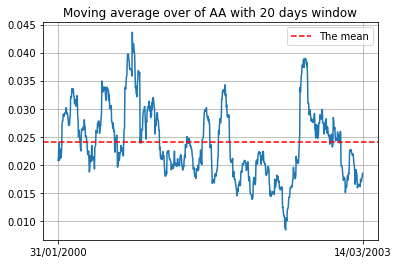

In [155]:
plt.plot(rolling_std['AA'][19:800])
plt.title('Moving average over of AA with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_std['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.grid()
plt.legend()
plt.show()

- Afin de meiux visualiser les données on peut faire une ACP pour voir la dispersion des actifs entre eux.

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [97]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.T)

In [98]:
pca = PCA(n_components=2)  # Vous pouvez ajuster le nombre de composantes principales en fonction de vos besoins
composantes_principales = pca.fit_transform(scaled_data)

In [99]:
df_composantes_principales = pd.DataFrame(data=composantes_principales, columns=['PC1', 'PC2'])

In [102]:
print(df_composantes_principales.shape)

(663, 2)


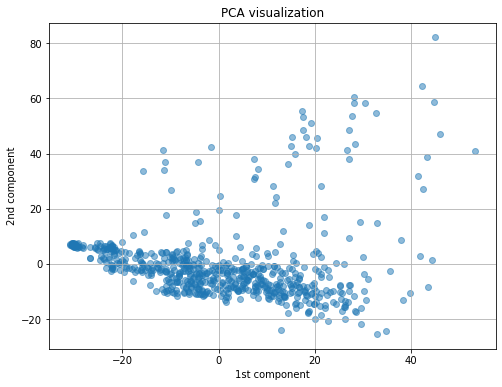

In [157]:
plt.figure(figsize=(8, 6))
plt.scatter(df_composantes_principales['PC1'], df_composantes_principales['PC2'], alpha=0.5)
plt.title('PCA visualization')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.grid(True)
plt.show()

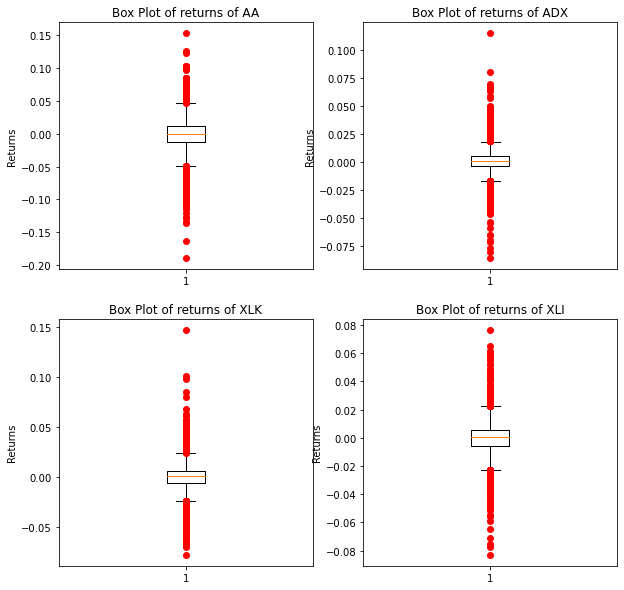

In [153]:
plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.boxplot(df_cleaned['AA'] , sym='ro')
plt.title('Box Plot of returns of AA')
plt.ylabel('Returns')

plt.subplot(2, 2, 2)
plt.boxplot(df_cleaned['ADX'] , sym='ro')
plt.title('Box Plot of returns of ADX')
plt.ylabel('Returns')

plt.subplot(2, 2, 3)
plt.boxplot(df_cleaned['XLK'] , sym='ro')
plt.title('Box Plot of returns of XLK')
plt.ylabel('Returns')

plt.subplot(2, 2, 4)
plt.boxplot(df_cleaned['XLI'] , sym='ro')
plt.title('Box Plot of returns of XLI')
plt.ylabel('Returns')



plt.show()

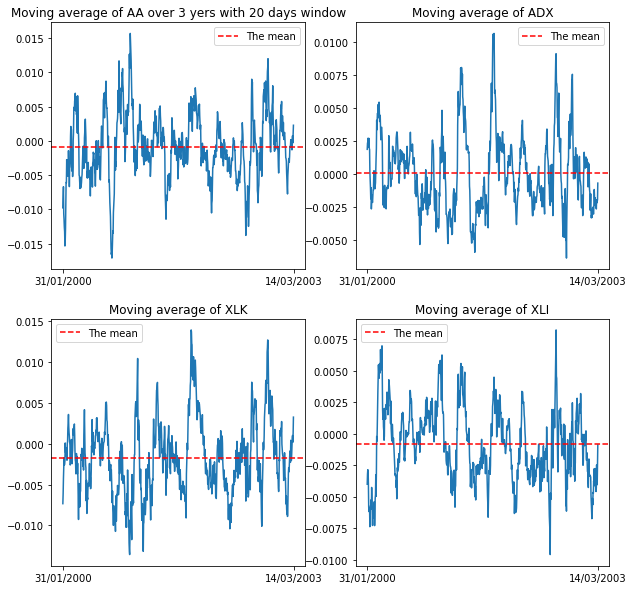

In [158]:
plt.figure(figsize=(10, 10))



plt.subplot(2, 2, 1)
plt.plot(rolling_mean['AA'][19:800])
plt.title('Moving average of AA over 3 yers with 20 days window')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['AA'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(rolling_mean['ADX'][19:800])
plt.title('Moving average of ADX')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['ADX'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(rolling_mean['XLK'][19:800])
plt.title('Moving average of XLK')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['XLK'][19:800].mean(), color='r', linestyle='--', label='The mean')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(rolling_mean['XLI'][19:800])
plt.title('Moving average of XLI')
plt.xticks([df_cleaned.index[19],df_cleaned.index[800]])
plt.axhline(y=rolling_mean['XLI'][19:800].mean(), color='r', linestyle='--', label='The mean')

plt.legend()
plt.show()